Loading Data

In [1]:
import pandas as pd
import numpy as np

# Load each CSV file and rename columns
home_price = pd.read_csv('CSUSHPISA.csv')
mortgage_rate = pd.read_csv('MORTGAGE30US.csv')
unemployment = pd.read_csv('UNRATE.csv')
housing_supply = pd.read_csv('MSACSR.csv')
building_permits = pd.read_csv('PERMIT.csv')
cpi = pd.read_csv('CPIAUCSL.csv')


In [2]:
print(home_price)

    observation_date  CSUSHPISA
0         2004-01-01    141.647
1         2004-02-01    143.192
2         2004-03-01    145.058
3         2004-04-01    146.593
4         2004-05-01    148.186
..               ...        ...
246       2024-07-01    321.523
247       2024-08-01    322.479
248       2024-09-01    323.454
249       2024-10-01    324.585
250       2024-11-01    326.008

[251 rows x 2 columns]


Renaming the columns

In [3]:

home_price = home_price.rename(columns={'observation_date': 'DATE', 'CSUSHPISA': 'home_price'})

mortgage_rate = mortgage_rate.rename(columns={'observation_date': 'DATE', 'MORTGAGE30US': 'mortgage_rate'})

unemployment = unemployment.rename(columns={'observation_date': 'DATE', 'UNRATE': 'unemployment'})

housing_supply = housing_supply.rename(columns={'observation_date': 'DATE', 'MSACSR': 'housing_supply'})

building_permits = building_permits.rename(columns={'observation_date': 'DATE', 'PERMIT': 'building_permits'})

cpi = cpi.rename(columns={'observation_date': 'DATE', 'CPIAUCSL': 'cpi'})

In [4]:
print(home_price,mortgage_rate,unemployment,housing_supply,building_permits,cpi)


           DATE  home_price
0    2004-01-01     141.647
1    2004-02-01     143.192
2    2004-03-01     145.058
3    2004-04-01     146.593
4    2004-05-01     148.186
..          ...         ...
246  2024-07-01     321.523
247  2024-08-01     322.479
248  2024-09-01     323.454
249  2024-10-01     324.585
250  2024-11-01     326.008

[251 rows x 2 columns]             DATE  mortgage_rate
0     2004-01-08           5.87
1     2004-01-15           5.66
2     2004-01-22           5.64
3     2004-01-29           5.68
4     2004-02-05           5.72
...          ...            ...
1082  2024-10-03           6.12
1083  2024-10-10           6.32
1084  2024-10-17           6.44
1085  2024-10-24           6.54
1086  2024-10-31           6.72

[1087 rows x 2 columns]            DATE  unemployment
0    2004-01-01           5.7
1    2004-02-01           5.6
2    2004-03-01           5.8
3    2004-04-01           5.6
4    2004-05-01           5.6
..          ...           ...
246  2024-07-01      

Set date as Index


In [5]:
datasets = {
    "home_price": home_price,
    "mortgage_rate": mortgage_rate,
    "unemployment": unemployment,
    "housing_supply": housing_supply,
    "building_permits": building_permits,
    "cpi": cpi
}

for name, df in datasets.items():
    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)

In [6]:
print(home_price,mortgage_rate,unemployment,housing_supply,building_permits,cpi)


            home_price
DATE                  
2004-01-01     141.647
2004-02-01     143.192
2004-03-01     145.058
2004-04-01     146.593
2004-05-01     148.186
...                ...
2024-07-01     321.523
2024-08-01     322.479
2024-09-01     323.454
2024-10-01     324.585
2024-11-01     326.008

[251 rows x 1 columns]             mortgage_rate
DATE                     
2004-01-08           5.87
2004-01-15           5.66
2004-01-22           5.64
2004-01-29           5.68
2004-02-05           5.72
...                   ...
2024-10-03           6.12
2024-10-10           6.32
2024-10-17           6.44
2024-10-24           6.54
2024-10-31           6.72

[1087 rows x 1 columns]             unemployment
DATE                    
2004-01-01           5.7
2004-02-01           5.6
2004-03-01           5.8
2004-04-01           5.6
2004-05-01           5.6
...                  ...
2024-07-01           4.2
2024-08-01           4.2
2024-09-01           4.1
2024-10-01           4.1
2024-11-01    

Resampled the data on monthy basics for mortgage_rate

In [7]:
# Resample to month-end and convert to month-start
mortgage_rate_monthly = datasets["mortgage_rate"].resample('M').last()
mortgage_rate_monthly.index = mortgage_rate_monthly.index.to_period('M').to_timestamp('M') + pd.offsets.MonthBegin(-1)

C:\Users\Kunal\AppData\Local\Temp\ipykernel_23336\669867819.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mortgage_rate_monthly = datasets["mortgage_rate"].resample('M').last()


In [8]:
print(mortgage_rate_monthly,mortgage_rate)

            mortgage_rate
DATE                     
2004-01-01           5.68
2004-02-01           5.58
2004-03-01           5.40
2004-04-01           6.01
2004-05-01           6.32
...                   ...
2024-06-01           6.86
2024-07-01           6.78
2024-08-01           6.35
2024-09-01           6.08
2024-10-01           6.72

[250 rows x 1 columns]             mortgage_rate
DATE                     
2004-01-08           5.87
2004-01-15           5.66
2004-01-22           5.64
2004-01-29           5.68
2004-02-05           5.72
...                   ...
2024-10-03           6.12
2024-10-10           6.32
2024-10-17           6.44
2024-10-24           6.54
2024-10-31           6.72

[1087 rows x 1 columns]


Merging the data

In [9]:
data = pd.concat([
    datasets["home_price"],
    mortgage_rate_monthly,
    datasets["unemployment"],
    datasets["housing_supply"],
    datasets["building_permits"],
    datasets["cpi"]
], axis=1)
data = data.dropna()
print(data.head())

            home_price  mortgage_rate  unemployment  housing_supply  \
DATE                                                                  
2004-01-01     141.647           5.68           5.7             3.8   
2004-02-01     143.192           5.58           5.6             3.7   
2004-03-01     145.058           5.40           5.8             3.6   
2004-04-01     146.593           6.01           5.6             4.0   
2004-05-01     148.186           6.32           5.6             3.8   

            building_permits    cpi  
DATE                                 
2004-01-01              1952  186.3  
2004-02-01              1966  186.7  
2004-03-01              2066  187.1  
2004-04-01              2070  187.4  
2004-05-01              2150  188.2  


Cleaned and concated Data is exported

In [2]:
# data.to_csv('cleaned_data.csv', index=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

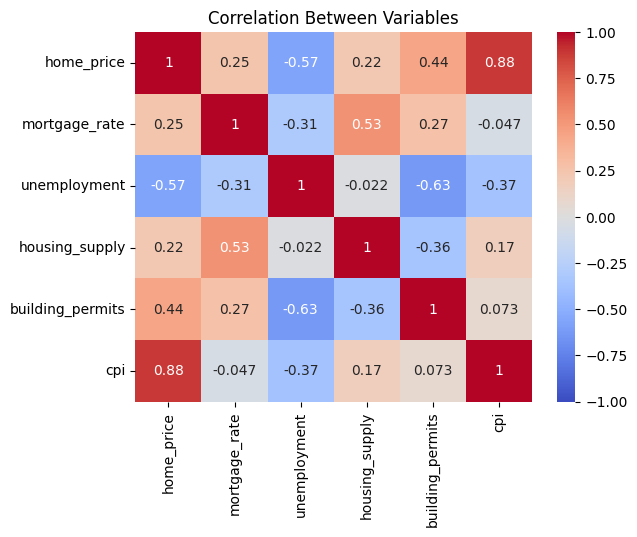

In [ ]:
# heatmap for corelation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Variables')
plt.show()

From above map we can see the cpi is highly co-related to home_price as it has 0.88 corelation
And unemployement is invesrely co related to the home_price as the value in -ve

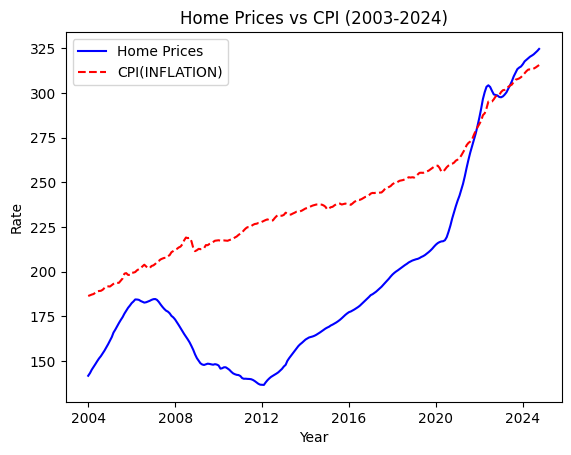

In [ ]:
# Plot home prices mortgage rates
plt.plot(data['home_price'], label='Home Prices', color='blue')
plt.plot(data['cpi'], label='CPI(INFLATION)', color='red', linestyle='--')
plt.title('Home Prices vs CPI (2003-2024)')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.show()


<Axes: xlabel='home_price', ylabel='cpi'>

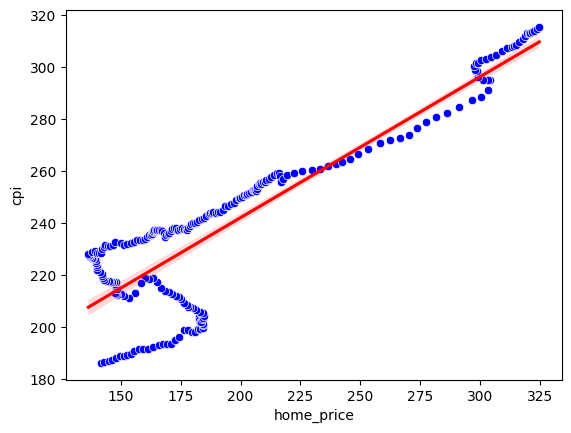

In [ ]:
# Home_price and CPI see here the data is not scatter too much and hence cpi(Inflation)
sns.scatterplot(data=data,x='home_price',y='cpi',color='blue')
sns.regplot(data=data,x='home_price', y='cpi',scatter=False,color='red')

<Axes: xlabel='home_price', ylabel='housing_supply'>

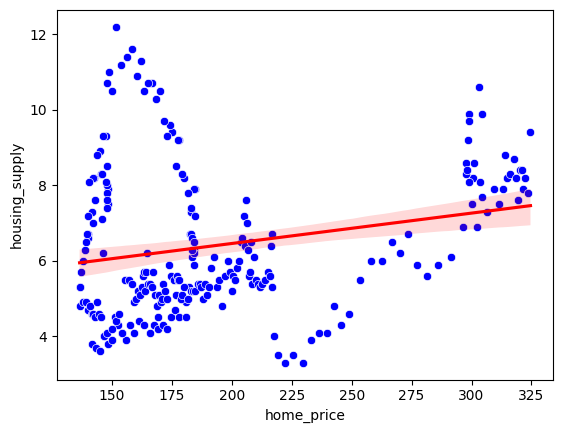

In [ ]:
# here data is more scatterd and has spread too

sns.scatterplot(data=data,x='home_price',y='housing_supply',color='blue')
sns.regplot(data=data,x='home_price', y='housing_supply',scatter=False,color='red')

<Axes: xlabel='home_price', ylabel='unemployment'>

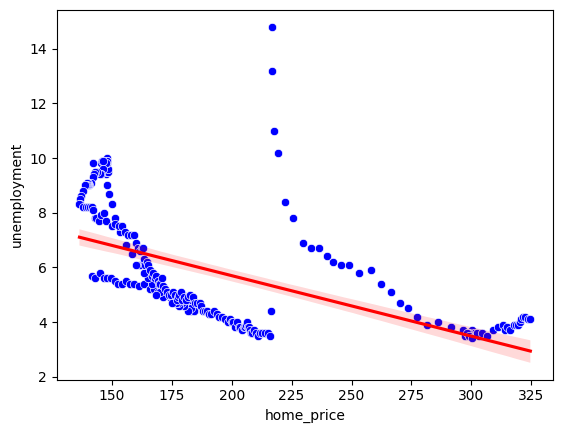

In [ ]:
# Home_price and Unemployement we can see that here the data is more scatterd and and minimum spread

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data,x='home_price',y='unemployment',color='blue')
sns.regplot(data=data,x='home_price', y='unemployment',scatter=False,color='red')